In [1]:
!nvidia-smi

Thu Mar 10 00:45:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 54 kB/s 
     |████████████████████████████████| 2.9 MB 32.5 MB/s 
     |████████████████████████████████| 459 kB 46.7 MB/s 
     |████████████████████████████████| 20.1 MB 64.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:


In [1]:
!wget https://www.dropbox.com/s/7p0s2ojc5i26qes/college_Dataset_3_channel.zip?dl=0

--2022-03-10 00:47:23--  https://www.dropbox.com/s/7p0s2ojc5i26qes/college_Dataset_3_channel.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7p0s2ojc5i26qes/college_Dataset_3_channel.zip [following]
--2022-03-10 00:47:23--  https://www.dropbox.com/s/raw/7p0s2ojc5i26qes/college_Dataset_3_channel.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05d7e3f438ca794e8c9e413faf.dl.dropboxusercontent.com/cd/0/inline/BhJIsjsdAyL17ErO24hbbRif_ODf2Wh60vUOn9xOg2MJLKClB2iOteCGWWqenUXuX6nht70hdr8KsPS5bKNTPULIQR98haATLXSNXwXlv7OTBqo5qpMVoHrGj5vRbFGROgengux0tFq-dqNaV8ScizC8gaXoDsVEyPqco1OAIw1qVA/file# [following]
--2022-03-10 00:47:23--  https://uc05d7e3f438ca794e8c9e413faf.dl.dropboxusercontent.com/cd/0/inline/BhJIsjsdAyL1

In [2]:
!unzip -q "/content/college_Dataset_3_channel.zip?dl=0"

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#from livelossplot import PlotLossesKerasTF

In [4]:
tf.__version__

'2.3.0'

In [5]:
img_height = 300
img_width = 300
batch_size = 32

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1) # validation split

In [7]:
from pathlib import Path
# Creating the Pathlib PATH objects
train_data_dir= Path("/content/Dataset_3_channel/Train")

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data


validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1354 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(img_width,img_height,3)))
model.add(keras.layers.MaxPool2D())
#model.add(keras.layers.Dropout(0.5))


# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
#model.add(keras.layers.Dropout(0.5))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))

# Convolutional layer and maxpool layer 5
model.add(keras.layers.Conv2D(256,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.5))

# # Convolutional layer and maxpool layer 6
# model.add(keras.layers.Conv2D(256,(3,3),activation='relu'))
# model.add(keras.layers.MaxPool2D())
# #model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 64)        0

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss='binary_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
    )

In [11]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("bw_base.h5",verbose=1,save_best_only=True,
                                                 save_weights_only = True)
# if false then it will save for every iteration

#early_stop1 = tf.keras.callbacks.EarlyStopping(patience=10)

csv_log = tf.keras.callbacks.CSVLogger(
    'base.csv', separator=',', append=False)

In [12]:
history = model.fit(train_generator,
         steps_per_epoch = train_generator.samples // batch_size,
         validation_data = validation_generator,
         validation_steps = validation_generator.samples // batch_size,
         epochs = 100,
         callbacks=[checkpoint, csv_log]
                     )

Epoch 1/100
42/42 [==============================] - ETA: 0s - loss: 0.6283 - accuracy: 0.6467 - precision: 0.6400 - recall: 0.6757
Epoch 00001: val_loss improved from inf to 0.59305, saving model to bw_base.h5
42/42 [==============================] - 10s 246ms/step - loss: 0.6283 - accuracy: 0.6467 - precision: 0.6400 - recall: 0.6757 - val_loss: 0.5930 - val_accuracy: 0.6406 - val_precision: 0.7179 - val_recall: 0.4444
Epoch 2/100
42/42 [==============================] - ETA: 0s - loss: 0.5079 - accuracy: 0.7685 - precision: 0.8266 - recall: 0.6788
Epoch 00002: val_loss improved from 0.59305 to 0.55040, saving model to bw_base.h5
42/42 [==============================] - 9s 225ms/step - loss: 0.5079 - accuracy: 0.7685 - precision: 0.8266 - recall: 0.6788 - val_loss: 0.5504 - val_accuracy: 0.7031 - val_precision: 0.8250 - val_recall: 0.5156
Epoch 3/100
42/42 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.8094 - precision: 0.8785 - recall: 0.7154
Epoch 00003: va

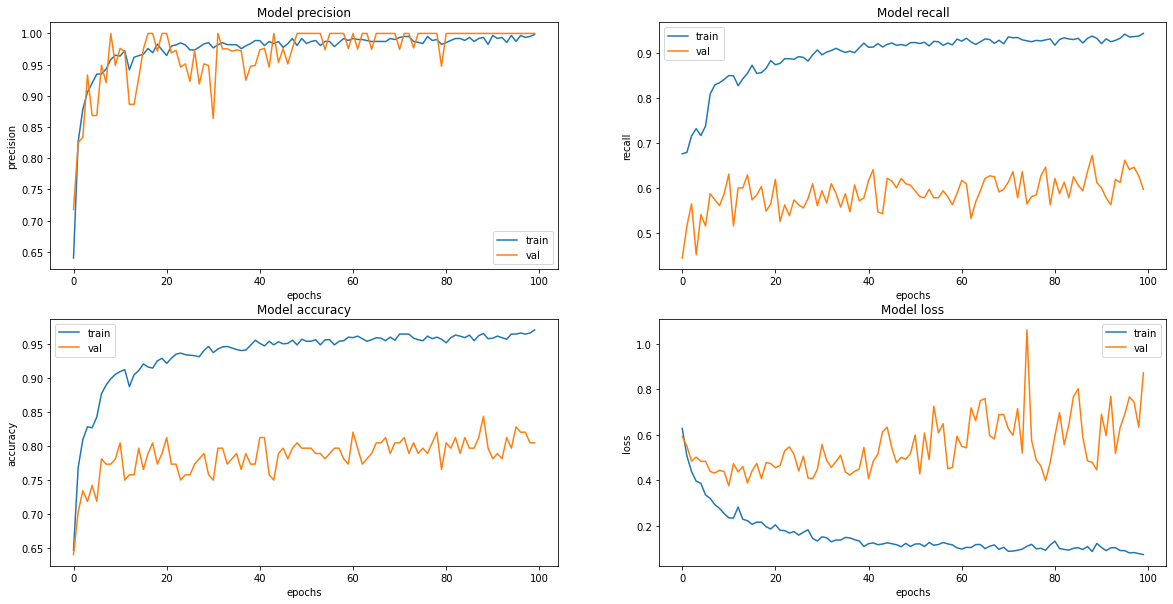

In [14]:
# Interpreting the Metrics 
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [13]:
# Saving the best Model
# Load the best weights
model.load_weights("bw_base.h5")
# Save the whole model (weigths + architecture)
model.save("base.h5")

In [15]:
# Loading the whole model
loaded_model = tf.keras.models.load_model("base.h5")

In [16]:
test_data_dir= Path("/content/Dataset_3_channel/Test")

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0) # set test split

In [18]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='binary',
    subset='training')

Found 320 images belonging to 2 classes.


In [19]:
# Evaluating the loaded model
loss, acc, prec, rec = loaded_model.evaluate(test_generator)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

10/10 [==============================] - 2s 166ms/step - loss: 0.4268 - accuracy: 0.8562 - precision: 0.8851 - recall: 0.8188
 Testing Acc :  0.856249988079071
 Testing Precision  0.8851351141929626
 Testing Recall  0.8187500238418579


In [20]:
# for best model we got
prect = 0.8851351141929626
rect = 0.8187500238418579

In [21]:
F1t = 2*((prect*rect)/(prect+rect))
F1t

0.850649353846226

## tif to png

In [3]:
import cv2, os
base_path = "E:\\U_net\\UD\\NewUnet\\train_mask\\train\\"
new_path = "D:\\"
for infile in os.listdir(base_path):
    if infile == '535.tiff':
        print ("file : " + infile)
        read = cv2.imread(base_path + infile)
        outfile = infile.split('.')[0] + '.jpg'
        cv2.imwrite(new_path+outfile,read,[int(cv2.IMWRITE_JPEG_QUALITY), 200])

file : 535.tiff
